## Breast Cancer Detection with SVM

**Done by:**<br>Gabriel Egbenya<br>Breast Cancer Detection With SVM & KNN<br>AKA devgabriel

# Overview
##### Objective 1: Train a KNN algorithm to detect breast cancer.
* I imported the necessary libraries
* I Imported the  breast-cancer-wisconsin.data datasets from their website , and assigned them to data_df.
* I Performed some data exploration on the dataset for clarity purposes.
* I identified and deleted duplicates values.
* I identified the missing value ('?') in the “bare_nuclei” column, since the missing values was about 2% of the entire data, I deleted the rows with missing values.
* I deleted the id columns from the DataFrame. It was non significant to our prediction.
* I visualise my DataFrame using matplotlib hist, seaborn countplot, and pandas scatter_matrix to gain better insight on the data
* I split the data into features and response then labelled them X and y respectively.
* I used train_test_split to split the data into training and test set with test_size=.20 and random_state=42
* I scaled the X_train and X_test dataset using MinMaxScaler() in other to normalised the DataFrame.
* I used the KNeighborsClassifier to instantiate a model on the normalised training data, %timed the model, and then fit the model, then made predictions.
* I computed the accuracy score.

##### Objective 2: Train a SVM to detect breast cancer.
* I took the scaled normalised training dataset used to train KNN algorithm
* I trained the SVM Classifier on the training set, and %time the model
* I fit the model and them used the fitted model to make predictions
* I computed the accuracy for the  models.
* I described how I choose k=5
* I print the classification_report
* I computed the accuracy score.


## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

## 2. Load Dataset

In [2]:
# Load Dataset from website url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

#name the columns
columns = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

data_df = pd.read_csv(url, names=columns)

## 3. Data exploration and simple visualization

In [3]:
print(data_df.shape)

(699, 11)


In [4]:
#Check data info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   uniform_cell_size       699 non-null    int64 
 3   uniform_cell_shape      699 non-null    int64 
 4   marginal_adhesion       699 non-null    int64 
 5   single_epithelial_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chromatin         699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
data_df.describe()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
# Check if there are duplicates
dup_values = data_df.duplicated()
print(dup_values.any())

# List all duplicate rows
print(data_df[dup_values])

True
          id  clump_thickness  uniform_cell_size  uniform_cell_shape  \
208  1218860                1                  1                   1   
253  1100524                6                 10                  10   
254  1116116                9                 10                  10   
258  1198641                3                  1                   1   
272   320675                3                  3                   5   
338   704097                1                  1                   1   
561  1321942                5                  1                   1   
684   466906                1                  1                   1   

     marginal_adhesion  single_epithelial_size bare_nuclei  bland_chromatin  \
208                  1                       1           1                3   
253                  2                       8          10                7   
254                  1                      10           8                3   
258                  1        

In [7]:
#delete all duplicate except the first

data_df = data_df.drop_duplicates()

In [8]:
#check for missing(Null) values

print(data_df.isna().sum())
print(data_df.isnull().sum())

id                        0
clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64
id                        0
clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64


In [9]:
#check the unique values in each columns and sort them. This will enable us drop single-value columns.

print(data_df.nunique().sort_values(ascending=True).reset_index(name='count'))

                     index  count
0                    class      2
1                  mitoses      9
2          clump_thickness     10
3        uniform_cell_size     10
4       uniform_cell_shape     10
5        marginal_adhesion     10
6   single_epithelial_size     10
7          bland_chromatin     10
8          normal_nucleoli     10
9              bare_nuclei     11
10                      id    645


In [10]:
#check for unique values in each column and list them.

for col in data_df.columns:
    print(col, data_df[col].unique())

id [ 1000025  1002945  1015425  1016277  1017023  1017122  1018099  1018561
  1033078  1035283  1036172  1041801  1043999  1044572  1047630  1048672
  1049815  1050670  1050718  1054590  1054593  1056784  1057013  1059552
  1065726  1066373  1066979  1067444  1070935  1071760  1072179  1074610
  1075123  1079304  1080185  1081791  1084584  1091262  1096800  1099510
  1100524  1102573  1103608  1103722  1105257  1105524  1106095  1106829
  1108370  1108449  1110102  1110503  1110524  1111249  1112209  1113038
  1113483  1113906  1115282  1115293  1116116  1116132  1116192  1116998
  1117152  1118039  1120559  1121732  1121919  1123061  1124651  1125035
  1126417  1131294  1132347  1133041  1133136  1136142  1137156  1143978
  1147044  1147699  1147748  1148278  1148873  1152331  1155546  1156272
  1156948  1157734  1158247  1160476  1164066  1165297  1165790  1165926
  1166630  1166654  1167439  1167471  1168359  1168736  1169049  1170419
  1170420  1171710  1171795  1171845  1172152  1

In [11]:
#view the column with irregularities
# data_df[data_df['bare_nuclei'] == '?']

# Convert '?' to NaN
data_df[data_df == '?'] = np.nan

# Print the number of NaNs
print(data_df.isnull().sum())
print('The total number of null value: ', data_df['bare_nuclei'].isna().sum())

id                         0
clump_thickness            0
uniform_cell_size          0
uniform_cell_shape         0
marginal_adhesion          0
single_epithelial_size     0
bare_nuclei               16
bland_chromatin            0
normal_nucleoli            0
mitoses                    0
class                      0
dtype: int64
The total number of null value:  16


In [12]:
#print shape of original DataFrame
print('Shape of the original DataFrame: ', data_df.shape)

# drop missing values
data_df.dropna(axis=0, inplace=True)

#print shape of new DataFrame
print("Shape of DataFrame After Dropping missing values: ", data_df.shape)

Shape of the original DataFrame:  (691, 11)
Shape of DataFrame After Dropping missing values:  (675, 11)


In [13]:
#Delete the id column. It is non-significant for our prediction

data_df = data_df.drop('id', axis=1)
data_df.shape

(675, 10)

In [14]:
data_df

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


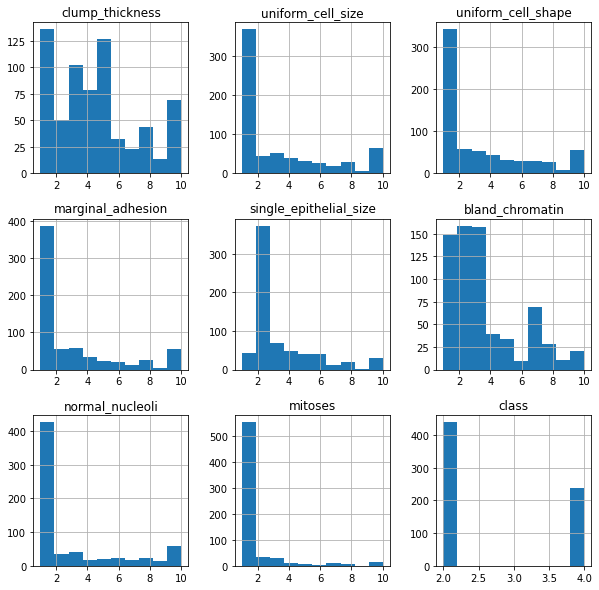

In [15]:
# Plot histograms for each variable
data_df.hist(figsize = (10, 10))
plt.show()

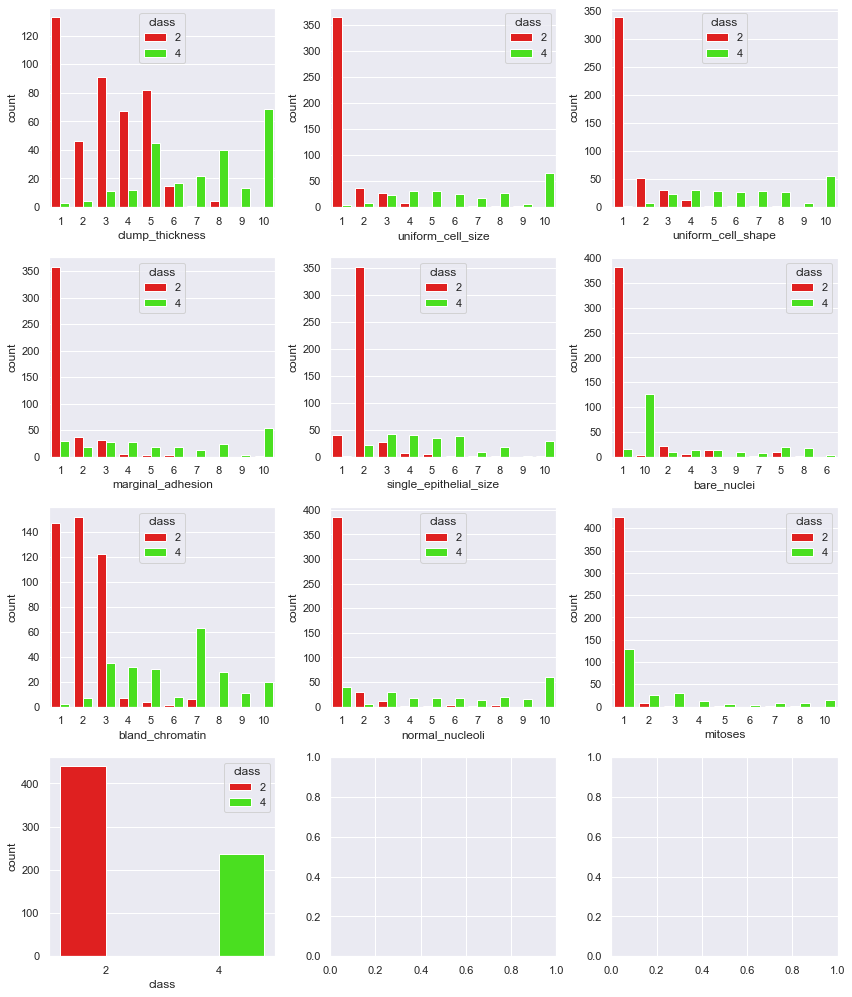

In [16]:
#visualise data distribution.

sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(4,3, figsize=(12,14), sharex=False)
axes = axes.flatten()[:len(data_df.columns)]
for ax, catplot in zip(axes, data_df.columns):
    sns.countplot(x=catplot, hue="class", data=data_df, ax=ax, dodge=True, palette=['#ff0000','#38ff00'])
plt.tight_layout()
plt.show()

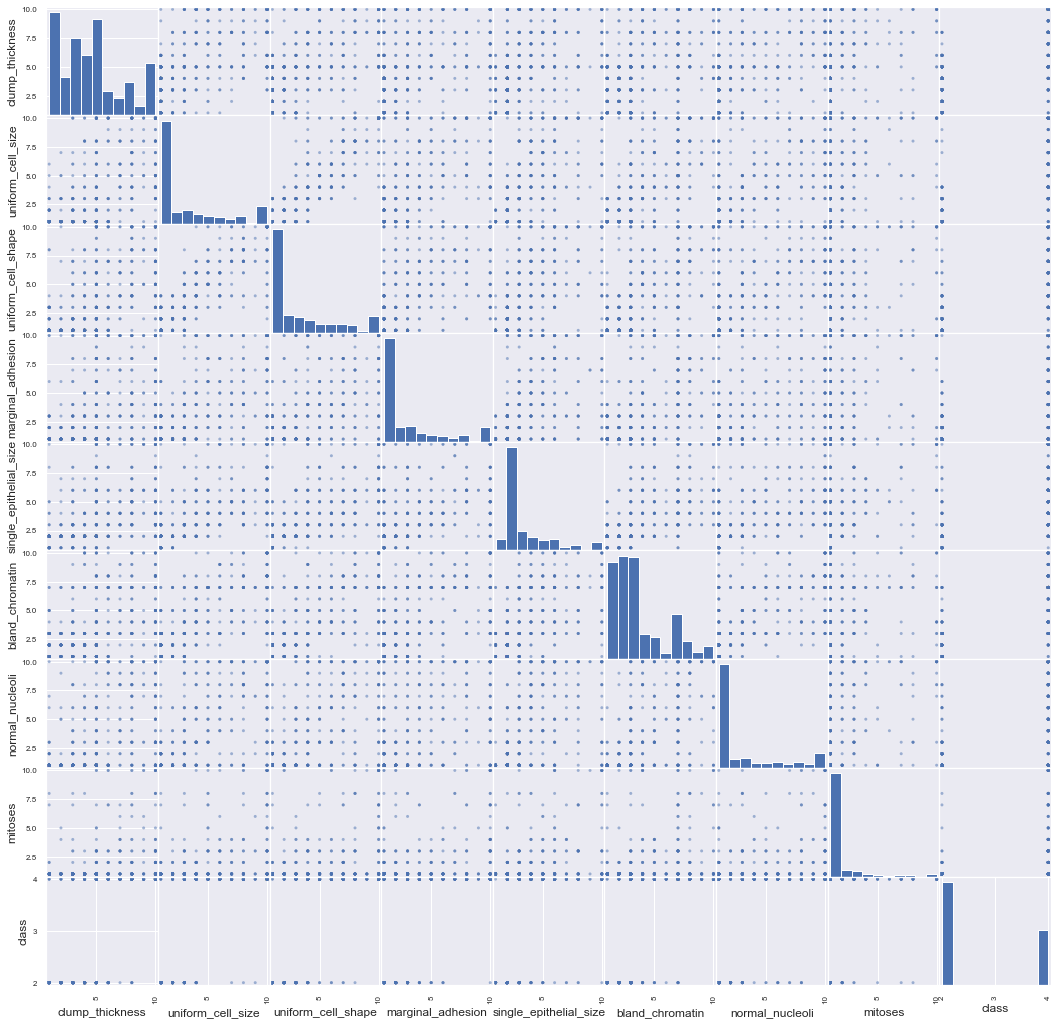

In [17]:
# Create scatter plot matrix

from pandas.plotting import scatter_matrix

scatter_matrix(data_df, figsize = (18,18))
plt.show()

## Split the data into training and test set

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#create model features by dropping the target columns
X = data_df.drop('class', axis=1)

#create model response by selecting on the target columns
y = data_df['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_train shape:  (540, 9)
y_train shape:  (540,)


## Using KNeighborsClassifier to instantiate a model and then fit the model using the features and response data.

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

#scale the data
scaler = MinMaxScaler()
#fit the scaled data
scaler.fit(X_train)

#transform the fitted training data
normalized_X_train = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

#instantiate the KNN model.
knn = KNeighborsClassifier(n_neighbors=5,
                          p=2,
                          metric='minkowski')

#fit the instantiated model
%time knn.fit(normalized_training_data, y_train)

#make prediction on the normalized_X_test
y_pred_knn_label = knn.predict(normalized_X_test)


Wall time: 1.68 ms


In [103]:
from sklearn.metrics import accuracy_score

y_test  = np.array(y_test)         #The Actual data in the y_test set
y_pred_knn_label                       # Our predicted data using KNN model on test set

accuracy = round(accuracy_score(y_test, y_pred_knn_label), 4) #round the score to 2 decimal place.

print("Accuracy score for KNN: ", accuracy * 100,"%")

Accuracy score for KNN:  94.81 %


# How to Choose K

By convention, many people try using `K = 5`.  But you should certainly perform a more scientific analysis.  The below code employs various `K` values and performs cross-validation using accuracy as the test metric.

In [45]:
from sklearn.model_selection import cross_val_score

num_neighbors = list(range(1, 30, 2))

# empty list that will hold cv scores
cv_scores = [ ]

#perform 10-fold cross-validation
for k in num_neighbors:
    knn4 = KNeighborsClassifier(n_neighbors=k,
                               p=2,
                               metric='minkowski')
    knn4.fit(normalized_X_train, y_train)
    
    scores = cross_val_score(knn4,
                            normalized_X_train,
                            y_train,
                            cv=10,
                            scoring='accuracy')
    cv_scores.append(scores.mean())
    
cv_scores

[0.9481481481481481,
 0.9592592592592591,
 0.9685185185185186,
 0.9666666666666666,
 0.9648148148148147,
 0.9685185185185186,
 0.9666666666666666,
 0.9666666666666666,
 0.9685185185185186,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666666]

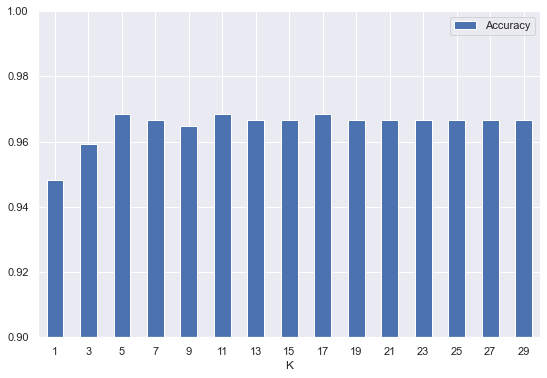

In [43]:
cv_scores_df = pd.DataFrame({"K": [k for k in num_neighbors], 
              "Accuracy": cv_scores}).set_index("K")
# print(cv_scores_df)
cv_scores_df.plot.bar(figsize=(9,6), ylim=(0.9, 1.0), rot=0)
plt.show()

In [42]:
# Changing to misclassification error
mse = [1-x for x in cv_scores]

# determing best k
optimal_k = num_neighbors[mse.index(min(mse))]
print("The optimal no. of neighbors is {}".format(optimal_k))

The optimal no. of neighbors is 5


## Using SVM to instantiate a model and then fit the model using the features and response data.

In [80]:
# "Support vector classifier"
from sklearn.svm import SVC

#instantiate a model called svm.
svm = SVC()

#fit the instantiated model
%time svm.fit(normalized_X_train, y_train)

#make prediction on the normalized_X_test
y_pred_svm_label = svm.predict(normalized_X_test)

In [81]:
from sklearn.metrics import accuracy_score

y_test               #The Actual data in the y_test set
y_pred_svm_label         # Our predicted data using KNN model on test set

svm_acc = round(accuracy_score(y_test, y_pred_svm_label), 4) #round the score to 2 decimal place.

print("Accuracy score for svm: ", accuracy * 100,"%")

Accuracy score for svm:  94.81 %


In [82]:
from sklearn.metrics import classification_report
print("KNN")
print(accuracy)
print(classification_report(y_test, y_pred_knn_label))

print("SVM")
print(svm_acc)
print(classification_report(y_test, y_pred_svm_label))

KNN
0.9481
              precision    recall  f1-score   support

           2       0.92      1.00      0.96        80
           4       1.00      0.87      0.93        55

    accuracy                           0.95       135
   macro avg       0.96      0.94      0.95       135
weighted avg       0.95      0.95      0.95       135

SVM
0.9556
              precision    recall  f1-score   support

           2       0.94      0.99      0.96        80
           4       0.98      0.91      0.94        55

    accuracy                           0.96       135
   macro avg       0.96      0.95      0.95       135
weighted avg       0.96      0.96      0.96       135

